In [1]:
from utils.preprocessing import Preprocessor
from utils.utils import create_split
import xgboost as xgb
import pandas as pd
from Validation.Validation import doFullValidation
import os

In [2]:
# Load and split data

# TODO: automatically create or load depending if pkl format exists
# Add output pickle file to data folder

def getPickleFile(directory_path):
    files = os.listdir(directory_path)
    for file in files:
        if file.endswith(".pkl"):
            return file
    return False


path = "data/SamplesV2/CloseByPion/histo"
file = getPickleFile(path)
file = "NtupleMaxTrackster.pkl"
if os.path.isfile(os.path.join(path,file)):
    print("%s exists. Load File"%file)
    d = Preprocessor.loadNtuple(os.path.join(path,file))
else:
    print("%s doesn't exist. Create File"%file)
    preprocessor = Preprocessor(path)
    preprocessor.saveToPickle(os.path.join(path,file))
    d = Preprocessor.loadNtuple(os.path.join(path,file))
X_train, y_train, X_test, y_test = create_split(d)


NtupleMaxTrackster.pkl doesn't exist. Create File


TypeError: getMaxShapeVariable() missing 1 required positional argument: 'mask'

In [ ]:
# Hyperparameter Search

# TODO: optional
regressor=xgb.XGBRegressor(eval_metric='rmse')
from sklearn.model_selection import GridSearchCV
# set up our search grid
param_grid = {"max_depth":    [3, 4, 5, 6],
              "n_estimators": [500, 1000, 1500, 2000],
              "learning_rate": [0.005, 0.01, 0.015, 0.02]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 1500}


In [7]:
# Create Model

#  TODO: store externally
settings = {"learning_rate":0.02,
           "n_estimators":1500,
           "max_depth":6,
           "eval_metric":'rmse'}

regressor=xgb.XGBRegressor(learning_rate = settings["learning_rate"],
                           n_estimators  = settings["n_estimators"],
                           max_depth     = settings["max_depth"],
                           eval_metric = settings["eval_metric"])

In [8]:
# Train
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [9]:
# Predict
predictions = regressor.predict(X_test)

In [10]:
y_test

91439     51.901257
76187    443.038788
62386    144.042480
92610     99.192192
15213    298.290955
            ...    
55088    201.295883
11836    404.018005
36860    375.893372
91311    181.787918
73514    541.513062
Name: cp_energy, Length: 18756, dtype: float64

Directory 'plots/XGBoost/v2/MaxTrackster' already exists.


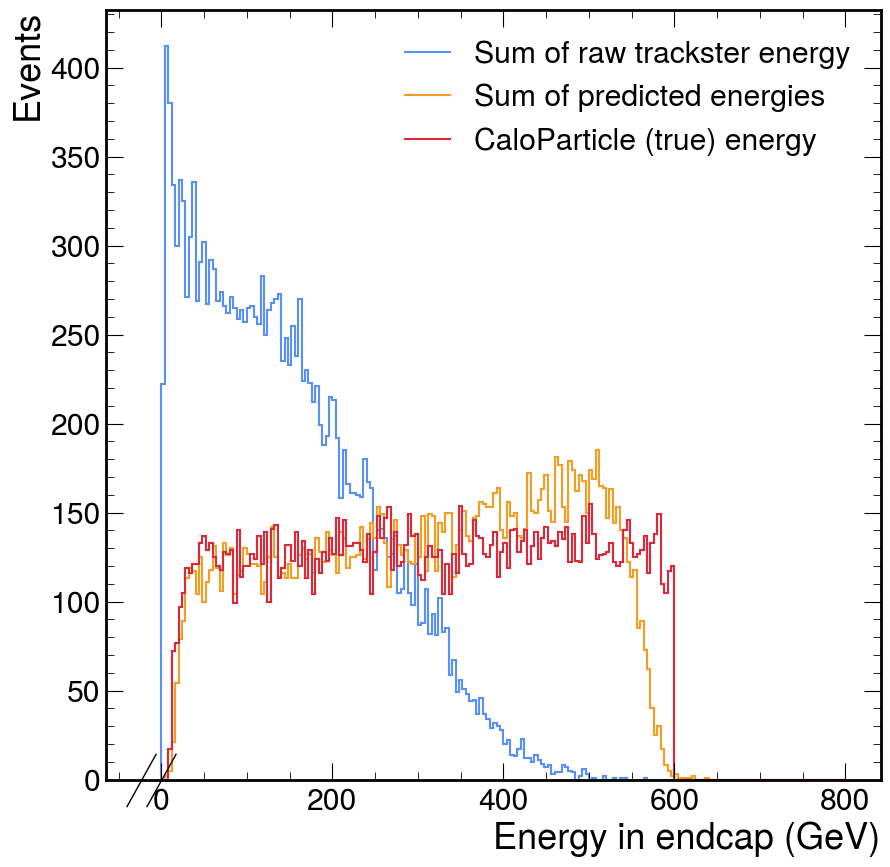

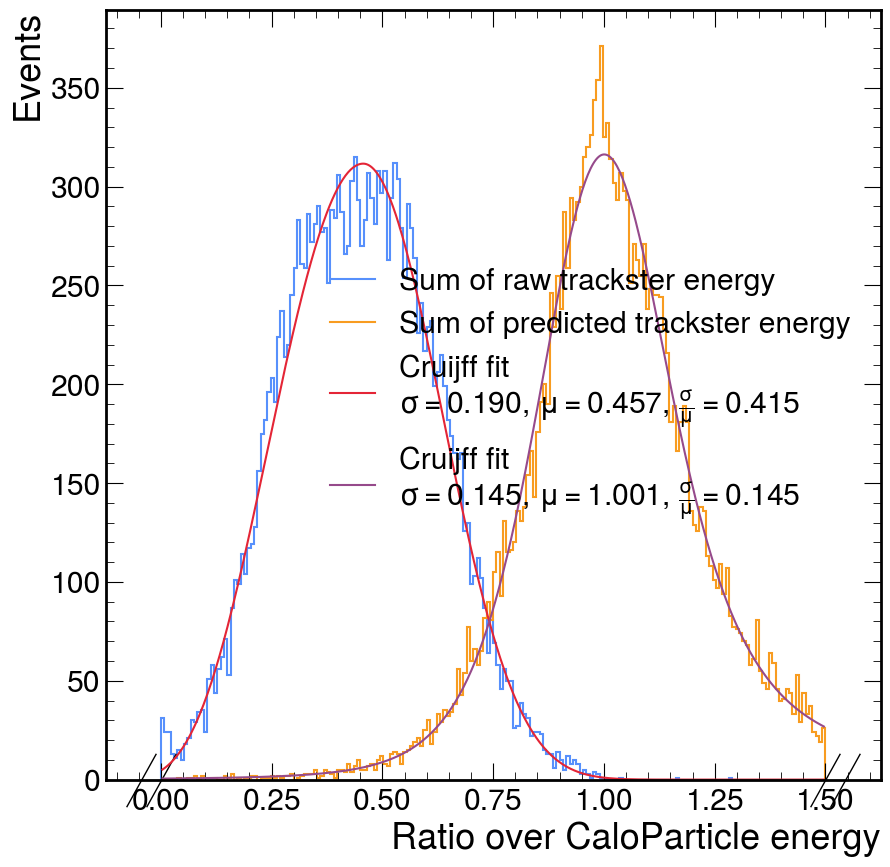

In [11]:
# Validation

#TODO: sensible output

def create_directory_if_not_exists(directory_path):
    # Check if the directory exists
    if not os.path.exists(directory_path):
        # Create the directory if it doesn't exist
        os.makedirs(directory_path)
        print(f"Directory '{directory_path}' created.")
    else:
        print(f"Directory '{directory_path}' already exists.")

path="plots/XGBoost/v2/MaxTrackster"
create_directory_if_not_exists(path)
doFullValidation(X_test, y_test, predictions,path)